In [34]:
from su2_element import SU2_element
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid']) #dependency: SciencePlots
from fibonacci import generate_vertices, generate_vertices_angles
from lattice_optimisation import lattice_optimizer, angles_to_cartesian
from linear_discetisation import Linear_disc_points
from genz_recreate import gen_all_points
from commutators import test_angular_momentum_comutator, fourier_vector, calc_r, La_Lb_commutator
from lattice_actions import calc_mean_distance
from derivative import angular_momentum, new_angular_momentum, mp_new_angular_momentum, angular_momentum_two_neighbors_new
import pathlib

Start = 256
End = 1770
N = 20

In [35]:
#num_of_points = np.geomspace(Start, End, N,endpoint= True, dtype=int)
num_of_points = np.arange(Start, End, dtype=int)
fib_Lattices = []
fib_angles = []
opt_Lattices = []

In [36]:
for i, num in enumerate(num_of_points):
    if i % 10 == 0:
        print(num)
    fib_angles.append(generate_vertices_angles(num))
    fib_Lattices.append(generate_vertices(num))
    opt_Lattices.append(angles_to_cartesian(lattice_optimizer(fib_angles[i], eps = 1e-10)[0]))

256
266
276
286
296
306
316
326
336
346
356
366
376
386
396
406
416
426
436
446
456
466
476
486
496
506
516
526
536
546
556
566
576
586
596
606
616
626
636
646
656
666
676
686
696
706
716
726
736
746
756
766
776
786
796
806
816
826
836
846
856
866
876
886
896
906
916
926
936
946
956
966
976
986
996
1006
1016
1026
1036
1046
1056
1066
1076
1086
1096
1106
1116
1126
1136
1146
1156
1166
1176
1186
1196
1206
1216
1226
1236
1246
1256
1266
1276
1286
1296
1306
1316
1326
1336
1346
1356
1366
1376
1386
1396
1406
1416
1426
1436
1446
1456
1466
1476
1486
1496
1506
1516
1526
1536
1546
1556
1566
1576
1586
1596
1606
1616
1626
1636
1646
1656
1666
1676
1686
1696
1706
1716
1726
1736
1746
1756
1766


In [37]:
a = 3

ks = np.array([[0,0,0],[0.1,0,0],[0.5,0,0],[1,0,0]])
fib_res = np.zeros((ks.shape[0], len(fib_Lattices)))
opt_res = np.zeros((ks.shape[0], len(opt_Lattices)))


for index, (fib,opt) in enumerate(zip(fib_Lattices,opt_Lattices)):
    if index % 50 == 0:
        #print(fib.shape)
        print(opt.shape)
    fib_comm = test_angular_momentum_comutator(fib, a, i=1, j=1, ang=new_angular_momentum)
    opt_comm = test_angular_momentum_comutator(opt, a, i=1, j=1, ang=new_angular_momentum)
    for i_k, k in enumerate(ks):
        fib_vec = fourier_vector(fib, a, k)
        opt_vec = fourier_vector(opt, a, k)
        fib_res[i_k, index] = calc_r(fib_comm, vec=fib_vec)
        opt_res[i_k, index] = calc_r(opt_comm, vec=opt_vec)

(256, 4)
(306, 4)
(356, 4)
(406, 4)
(456, 4)
(506, 4)
(556, 4)
(606, 4)
(656, 4)
(706, 4)
(756, 4)
(806, 4)
(856, 4)
(906, 4)
(956, 4)
(1006, 4)
(1056, 4)
(1106, 4)
(1156, 4)
(1206, 4)
(1256, 4)
(1306, 4)
(1356, 4)
(1406, 4)
(1456, 4)
(1506, 4)
(1556, 4)
(1606, 4)
(1656, 4)
(1706, 4)
(1756, 4)


In [38]:

mean_fib = []
mean_opt = []

for index, (fib, opt) in enumerate(zip(fib_Lattices,opt_Lattices)):
    if index % 50 ==0:
        print(index, "/", len(opt_Lattices)-1)
    mean_fib.append(calc_mean_distance(fib))
    mean_opt.append(calc_mean_distance(opt))

0 / 1513
50 / 1513
100 / 1513
150 / 1513
200 / 1513
250 / 1513
300 / 1513
350 / 1513
400 / 1513
450 / 1513
500 / 1513
550 / 1513
600 / 1513
650 / 1513
700 / 1513
750 / 1513
800 / 1513
850 / 1513
900 / 1513
950 / 1513
1000 / 1513
1050 / 1513
1100 / 1513
1150 / 1513
1200 / 1513
1250 / 1513
1300 / 1513
1350 / 1513
1400 / 1513
1450 / 1513
1500 / 1513


In [51]:
from scipy.signal import find_peaks
mean_fib = np.asarray(mean_fib)
mean_opt = np.asarray(mean_opt)

[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]


(0.0, 10.46657773727139)

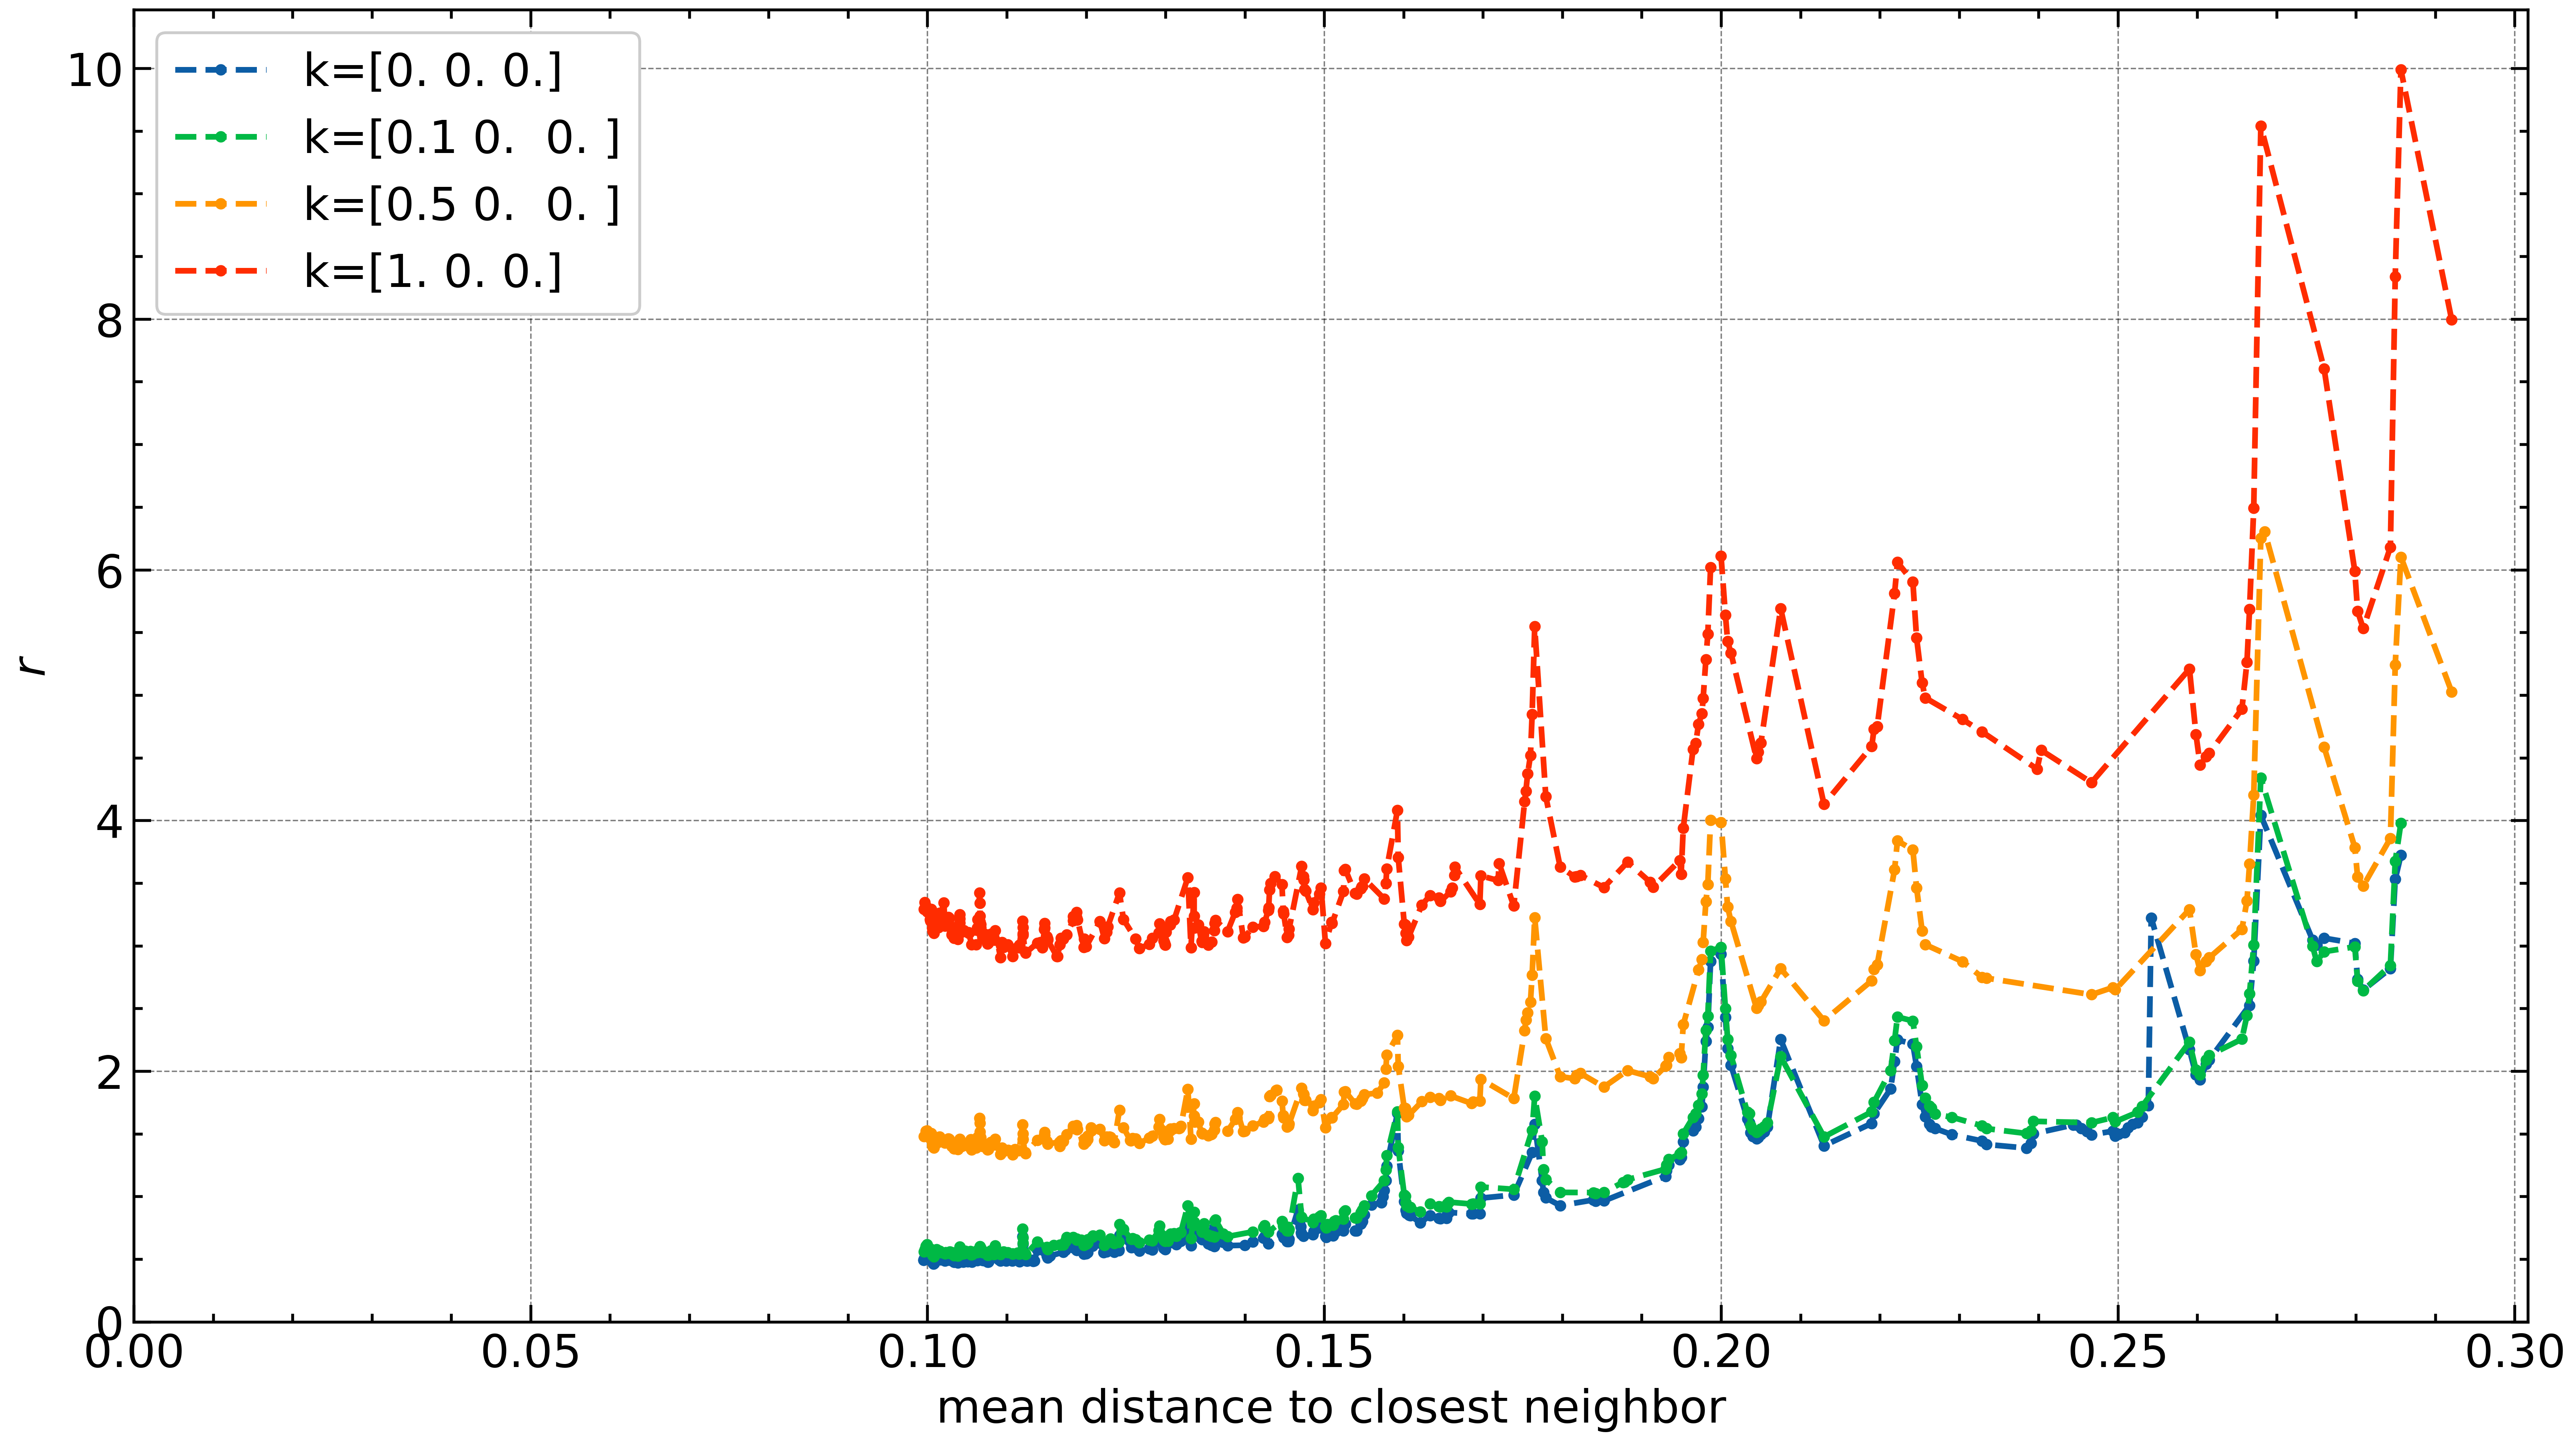

In [66]:
fig, axes = plt.subplots(1,1,figsize=(6.01299213 * 2.5,2.5 * 4.5/8 * 6.01299213), dpi=540)
#ks = np.array([[0,0,0],[0.1,0,0],[0.5,0,0],[1,0,0]])
for i_k, _ in enumerate(ks[:]):
    
    peaks, _ = find_peaks(fib_res[i_k,:], distance=1, height=(0.5,))
    #axes.plot(mean_lin, lin_res[i_k,:],"o--",label=fr"k = {ks[i_k]}")
    #axes.fill_between(1/N, lin_res[i_k,:]-lin_sig[i_k,:], lin_res[i_k,:]+lin_sig[i_k,:], alpha=0.3)
    mask_fib = np.ones_like(mean_fib, dtype=bool)
    mask_fib[peaks] = 0
    mask_fib[peaks+1] = 0
    mask_fib[peaks-1] = 0
    mask_fib[peaks-2] = 0

    print(mask_fib)
    axes.plot(mean_fib[mask_fib], fib_res[i_k,mask_fib],".--",label=f"k={ks[i_k]}")
    #axes.plot(mean_fib[peaks], fib_res[i_k,peaks], ".", color="red")
    #axes.plot(mean_opt, opt_res[i_k,:],".--",label=f"k={ks[i_k]}")
axes.legend(loc="best")
axes.set_xlabel("mean distance to closest neighbor")
axes.set_ylabel(r"$r$")
plt.xlim(left=0)
plt.ylim(bottom=0)

#plt.savefig("opt_1n_closeup_all_the_points.pdf")